In [84]:
import xarray as xr
import csv
import pandas as pd
import numpy as np
import os
import pickle as pkl
from datetime import datetime, date, timedelta
import sys
import matplotlib.pyplot as plt
import netCDF4 as nc
import glob

In [85]:
# Open daily files with HYCOM near TCs

In [86]:
# define start and end years
start_year = 2017
end_year = 2017
var_names_download = ['temp', 'salt']
var_names = ['temperature', 'salinity']
HYCOM_dir = '/Users/jacoposala/Desktop/CU/3.RESEARCH/ARGO_analysis/TC_HYCOM/DATA'
tag_file = 'HYCOM_GBLa0.08'

In [87]:
all_filenames = [i for i in sorted(glob.glob(HYCOM_dir + '/HYCOM_near_TC_csv/HYCOM_*.csv'))]

In [88]:
#combine all files in the list
combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ]).reset_index(drop=True)
#export to csv
combined_csv.to_csv("combined_csv.csv", index=False)

In [89]:
combined_csv # ADD LAT LONG HYCOM AND TIME FOR -5, 0 AND +5

,level_0,index,Unnamed: 0,ID,DATE,LAT,LONG,WIND,SEASON,TIMESTAMP,DATETIME,day_-5_temperature,day_-5_salinity,day_0_temperature,day_0_salinity,day_5_temperature,day_5_salinity
0,0,82735,85,SH052009,2009-01-01,-15.2,102.5,20,2009,2009-01-01 00:00:00,2009-01-01,"[[25.77219229115001, 25.68911482150752, 25.690...","[[34.695750197656864, 34.69674817931624, 34.69...","[[25.471457815734468, 25.479258881260375, 25.4...","[[34.706208050065555, 34.70466291697181, 34.70...","[[26.702815864505904, 26.692473662878168, 26.5...","[[34.64425334914832, 34.641249382639174, 34.63..."
1,4,82739,89,SH052009,2009-01-02,-14.3,98.2,20,2009,2009-01-02 00:00:00,2009-01-02,"[[25.720795427348776, 25.65684231261942, 25.43...","[[34.729280904776026, 34.729686589274735, 34.7...","[[25.103147772333077, 25.10798710489034, 25.09...","[[34.752681080684916, 34.75611555085159, 34.76...","[[26.836166385636837, 26.71648084752731, 26.61...","[[34.658408258817566, 34.65868124820109, 34.66..."
2,8,82743,93,SH052009,2009-01-03,-13.0,93.1,20,2009,2009-01-03 00:00:00,2009-01-03,"[[27.12306090726876, 27.116787816570103, 27.09...","[[34.36490671983248, 34.3638352409002, 34.3645...","[[27.650588040558308, 27.55130602723857, 27.36...","[[34.312505210416546, 34.326590235978266, 34.3...","[[28.17950963784714, 28.099391742819304, 27.94...","[[34.33620734478894, 34.340806528379716, 34.37..."
3,12,82747,97,SH052009,2009-01-04,-12.4,89.0,15,2009,2009-01-04 00:00:00,2009-01-04,"[[27.537904763419775, 27.384599537651514, 27.2...","[[34.389627425705164, 34.389008095107855, 34.3...","[[27.164870895263856, 27.0769646961093, 26.950...","[[34.34592004459027, 34.34790796794245, 34.355...","[[28.582714902484845, 28.49978797159265, 28.28...","[[34.430031601467554, 34.432105998797866, 34.4..."
4,13,86646,0,SH062009,2009-01-08,-14.1,70.7,25,2009,2009-01-08 06:00:00,2009-01-08 06:00:00,"[[28.196575749839948, 28.123557950917846, 27.8...","[[34.68584934694732, 34.687948527136285, 34.66...","[[28.33211686786636, 28.263277826744684, 28.15...","[[34.68044234105975, 34.68440632577182, 34.701...","[[27.375581001036153, 27.365573627533895, 27.3...","[[34.585491289603254, 34.584162471360436, 34.5..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7078,3257,107525,17,WP322018,2018-11-21,7.6,100.3,20,2018,2018-11-21 00:00:00,2018-11-21,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
7079,3258,98553,3,WP342018,2018-11-21,6.8,150.8,40,2018,2018-11-21 00:00:00,2018-11-21,"[[28.74495787489569, 28.43971056867546, 28.277...","[[33.495352223704444, 33.533447317171415, 33.6...","[[29.030424823825694, 28.889703636622805, 28.8...","[[34.09327551150364, 34.10504083552677, 34.125...","[[28.730091196888555, 28.641137925187213, 28.6...","[[34.1093534127462, 34.10740837047891, 34.1072..."
7080,3259,86938,52,SH042018,2018-11-21,-15.8,76.5,20,2018,2018-11-21 00:00:00,2018-11-21,"[[25.9303968389401, 25.948041717905557, 25.941...","[[34.94394214470643, 34.94435722856674, 34.945...","[[26.19612172457461, 26.195348649003215, 26.17...","[[34.903721273476314, 34.90604857333095, 34.90...","[[26.863835373212993, 26.883250711360652, 26.8...","[[34.91780222406734, 34.917201632249395, 34.91..."
7081,3266,98557,11,WP342018,2018-11-22,10.6,141.8,80,2018,2018-11-22 00:00:00,2018-11-22,"[[28.95148537435177, 28.919665962405208, 28.84...","[[34.02652396732579, 34.04122082199501, 34.073...","[[28.784136642075442, 28.78463978459778, 28.77...","[[34.19296980237488, 34.193261480223626, 34.19...","[[28.579388110855366, 28.579865625931024, 28.5...","[[34.35213452350496, 34.359151279845015, 34.36..."


In [90]:
# xarray with depth, time, deltatime and profile number

In [12]:
z_hycom = [0., 10.,  20.,  30.,  50.,  75., 100., 125., 150., 200.]


In [34]:
test = pd.read_csv('/Users/jacoposala/Desktop/CU/3.RESEARCH/ARGO_analysis/TC_HYCOM/DATA/HYCOM_near_TC_csv/HYCOM_GBLa0.08_2014-01-17.csv')

In [35]:
test['day_5_temperature'][0]


'[[28.543184372931936, 28.444224522053123, 28.439991705981267, 28.42584311615551, 28.399616022908187, 26.93868491996147, 25.222388014249656, 23.178838066053004, 20.011571771974634, 14.94193924666588, 11.56210175112519]]'

In [39]:
test['day_5_temperature'][0][2:20]

'28.543184372931936'

In [ ]:
df_select = combined_csv[combined_csv['ID']=='SH182016']


In [ ]:
df_select['day_5_temperature'][833]

In [ ]:
test['day_5_temperature'][0]

In [ ]:
eval(test['day_5_temperature'][0][1:-1])

In [91]:
# Salinity data for classification
# Convert data columns to nicer numpy arrays
salinity_day_minus5 = np.empty([combined_csv.shape[0],10])
# Set everything to nans for now
salinity_day_minus5[:] = np.nan

# Populate
for i in np.arange(combined_csv.shape[0]):
    if combined_csv['day_-5_temperature'][i][-2] != 'n': # only save cases where data at ALL depths are available (this won't work otherwise...)
        if np.array(list(map(float,list(combined_csv['day_-5_salinity'][i][2:-2].split(', '))))).shape[0] > 10: # keep only the first 10 depth levels
            salinity_day_minus5[i,:] = np.array(list(map(float,list(combined_csv['day_-5_salinity'][i][2:-2].split(', ')))))[:-1] # remove [] and the 11th level
        else:
            salinity_day_minus5[i,:] = np.array(list(map(float,list(combined_csv['day_-5_salinity'][i][2:-2].split(', '))))) # remove [] 


In [127]:
salinity_day_minus5.shape

(7083, 10)

In [114]:
combined_csv['day_-5_salinity'][i][2:-2]

'33.76636805118696, 33.78131536101761, 33.791382291925856, 33.80144664486005, 33.82486033242853, 33.91727107020517, 34.05732587015265, 34.929899697450644, 34.922603999088714, nan, nan'

In [116]:
combined_csv['day_-5_salinity'][i][2:-2].split(', ')

['33.76636805118696',
 '33.78131536101761',
 '33.791382291925856',
 '33.80144664486005',
 '33.82486033242853',
 '33.91727107020517',
 '34.05732587015265',
 '34.929899697450644',
 '34.922603999088714',
 'nan',
 'nan']

In [126]:
np.array(list(map(float,list(combined_csv['day_-5_salinity'][i][2:-2].split(', ')))))

array([33.76636805, 33.78131536, 33.79138229, 33.80144664, 33.82486033,
       33.91727107, 34.05732587, 34.9298997 , 34.922604  ,         nan,
               nan])

In [8]:
# STOP

In [9]:
# Determine percentage of profile depth levels where the variable value is larger than at the surface
# Comparing each pressure levels with the one at the surface, then calculating the difference 
# between each profile depth and the surface one:
# if >75% of the profiles have a positive difference -> increasing
# otherwise -> decreasing
perc_points_increasing_s = np.zeros(combined_csv.shape[0])
perc_points_decreasing_s = np.zeros(combined_csv.shape[0])

In [10]:
# Classify "profiles" based on salinity
for i in np.arange(0,combined_csv.shape[0]):
    perc_points_increasing_s[i] = (sum((salinity_day_minus5[i]
                                      -salinity_day_minus5[i][0])>0)
                                 /len(salinity_day_minus5[i])*100)
    perc_points_decreasing_s[i] = (sum((salinity_day_minus5[i]
                                      -salinity_day_minus5[i][0])<0)
                                 /len(salinity_day_minus5[i])*100)# Separates increasing and decreasing profile pairs    
    # E.g., 'Increasing' = profiles where at least 75% of the depth levels 
    # have VAR values higher than at the surface

In [11]:
# Create a DFS with increasing, decreasing, all
DFS = [(combined_csv[(perc_points_decreasing_s > 75) & (combined_csv['WIND'] >= 64)], 'decreasing_hurricanes_s'),
       (combined_csv[(perc_points_increasing_s > 75) & (combined_csv['WIND'] >= 64)], 'increasing_hurricanes_s'),
       (combined_csv[combined_csv['WIND'] >= 64], 'all_hurricanes_s')]

#pkl.dump(DFS, open('DFS_HYCOM.pkl', 'wb'))


In [12]:
# Distinguish arrays for each of the three cases (inc, dec, combined)
decreasing_hurricanes = DFS[0][0].iloc[:,3:].reset_index()
increasing_hurricanes = DFS[1][0].iloc[:,3:].reset_index()
all_hurricanes = DFS[2][0].iloc[:,3:].reset_index()

In [ ]:
increasing_hurricanes['day_-5_temperature']

In [30]:
# Select data 

# Convert data columns to nicer numpy arrays - INCREASING
temperature_day_minus5_inc = np.empty([increasing_hurricanes.shape[0],10])
temperature_day_plus5_inc = np.empty([increasing_hurricanes.shape[0],10])
temperature_day_0_inc = np.empty([increasing_hurricanes.shape[0],10])
salinity_day_minus5_inc = np.empty([increasing_hurricanes.shape[0],10])
salinity_day_plus5_inc = np.empty([increasing_hurricanes.shape[0],10])
salinity_day_0_inc = np.empty([increasing_hurricanes.shape[0],10])
# Set everything to nans for now
temperature_day_minus5_inc[:] = np.nan
temperature_day_plus5_inc[:] = np.nan
temperature_day_0_inc[:] = np.nan
salinity_day_minus5_inc[:] = np.nan
salinity_day_plus5_inc[:] = np.nan
salinity_day_0_inc[:] = np.nan

# Populate
for i in np.arange(increasing_hurricanes.shape[0]):
    if combined_csv['day_-5_temperature'][i][-2] != 'n': # only save cases where data at ALL depths are available (this won't work otherwise...)
        if np.array(list(map(float,list(increasing_hurricanes['day_-5_temperature'][i][2:-2].split(', '))))).shape[0] > 10:
            temperature_day_minus5_inc[i,:] = np.array(list(map(float,list(increasing_hurricanes['day_-5_temperature'][i][2:-2].split(', ')))))[:-1]
        else:
            temperature_day_minus5_inc[i,:] = np.array(list(map(float,list(increasing_hurricanes['day_-5_temperature'][i][2:-2].split(', ')))))
        
        if np.array(list(map(float,list(increasing_hurricanes['day_0_temperature'][i][2:-2].split(', '))))).shape[0] > 10:
            temperature_day_0_inc[i,:] = np.array(list(map(float,list(increasing_hurricanes['day_0_temperature'][i][2:-2].split(', ')))))[:-1]
        else:
            temperature_day_0_inc[i,:] = np.array(list(map(float,list(increasing_hurricanes['day_0_temperature'][i][2:-2].split(', ')))))
        
        if np.array(list(map(float,list(increasing_hurricanes['day_5_temperature'][i][2:-2].split(', '))))).shape[0] > 10:
            temperature_day_plus5_inc[i,:] = np.array(list(map(float,list(increasing_hurricanes['day_5_temperature'][i][2:-2].split(', ')))))[:-1]
        else:
            temperature_day_plus5_inc[i,:] = np.array(list(map(float,list(increasing_hurricanes['day_5_temperature'][i][2:-2].split(', ')))))
        
        if np.array(list(map(float,list(increasing_hurricanes['day_-5_salinity'][i][2:-2].split(', '))))).shape[0] > 10:
            salinity_day_minus5_inc[i,:] = np.array(list(map(float,list(increasing_hurricanes['day_-5_salinity'][i][2:-2].split(', ')))))[:-1]
        else:
            salinity_day_minus5_inc[i,:] = np.array(list(map(float,list(increasing_hurricanes['day_-5_salinity'][i][2:-2].split(', ')))))
        
        if np.array(list(map(float,list(increasing_hurricanes['day_0_salinity'][i][2:-2].split(', '))))).shape[0] > 10:
            salinity_day_0_inc[i,:] = np.array(list(map(float,list(increasing_hurricanes['day_0_salinity'][i][2:-2].split(', ')))))[:-1]
        else:
            salinity_day_0_inc[i,:] = np.array(list(map(float,list(increasing_hurricanes['day_0_salinity'][i][2:-2].split(', ')))))            
        
        if np.array(list(map(float,list(increasing_hurricanes['day_5_salinity'][i][2:-2].split(', '))))).shape[0] > 10:
            salinity_day_plus5_inc[i,:] = np.array(list(map(float,list(increasing_hurricanes['day_5_salinity'][i][2:-2].split(', ')))))[:-1]
        else:
            salinity_day_plus5_inc[i,:] = np.array(list(map(float,list(increasing_hurricanes['day_5_salinity'][i][2:-2].split(', ')))))

        

In [31]:
# Convert data columns to nicer numpy arrays - DECREASING
temperature_day_minus5_dec = np.empty([decreasing_hurricanes.shape[0],11])
temperature_day_plus5_dec = np.empty([decreasing_hurricanes.shape[0],11])
temperature_day_0_dec = np.empty([decreasing_hurricanes.shape[0],11])
salinity_day_minus5_dec = np.empty([decreasing_hurricanes.shape[0],11])
salinity_day_plus5_dec = np.empty([decreasing_hurricanes.shape[0],11])
salinity_day_0_dec = np.empty([decreasing_hurricanes.shape[0],11])
# Set everything to nans for now
temperature_day_minus5_dec[:] = np.nan
temperature_day_plus5_dec[:] = np.nan
temperature_day_0_dec[:] = np.nan
salinity_day_minus5_dec[:] = np.nan
salinity_day_plus5_dec[:] = np.nan
salinity_day_0_dec[:] = np.nan

# Populate
for i in np.arange(decreasing_hurricanes.shape[0]):
    if combined_csv['day_-5_temperature'][i][-2] != 'n': # only save cases where data at ALL depths are available (this won't work otherwise...)
        if np.array(list(map(float,list(decreasing_hurricanes['day_-5_temperature'][i][2:-2].split(', '))))).shape[0] > 10:
            temperature_day_minus5_inc[i,:] = np.array(list(map(float,list(decreasing_hurricanes['day_-5_temperature'][i][2:-2].split(', ')))))[:-1]
        else:
            temperature_day_minus5_inc[i,:] = np.array(list(map(float,list(decreasing_hurricanes['day_-5_temperature'][i][2:-2].split(', ')))))
        
        if np.array(list(map(float,list(decreasing_hurricanes['day_0_temperature'][i][2:-2].split(', '))))).shape[0] > 10:
            temperature_day_0_inc[i,:] = np.array(list(map(float,list(decreasing_hurricanes['day_0_temperature'][i][2:-2].split(', ')))))[:-1]
        else:
            temperature_day_0_inc[i,:] = np.array(list(map(float,list(decreasing_hurricanes['day_0_temperature'][i][2:-2].split(', ')))))
        
        if np.array(list(map(float,list(decreasing_hurricanes['day_5_temperature'][i][2:-2].split(', '))))).shape[0] > 10:
            temperature_day_plus5_inc[i,:] = np.array(list(map(float,list(decreasing_hurricanes['day_5_temperature'][i][2:-2].split(', ')))))[:-1]
        else:
            temperature_day_plus5_inc[i,:] = np.array(list(map(float,list(decreasing_hurricanes['day_5_temperature'][i][2:-2].split(', ')))))
        
        if np.array(list(map(float,list(decreasing_hurricanes['day_-5_salinity'][i][2:-2].split(', '))))).shape[0] > 10:
            salinity_day_minus5_inc[i,:] = np.array(list(map(float,list(decreasing_hurricanes['day_-5_salinity'][i][2:-2].split(', ')))))[:-1]
        else:
            salinity_day_minus5_inc[i,:] = np.array(list(map(float,list(decreasing_hurricanes['day_-5_salinity'][i][2:-2].split(', ')))))
        
        if np.array(list(map(float,list(decreasing_hurricanes['day_0_salinity'][i][2:-2].split(', '))))).shape[0] > 10:
            salinity_day_0_inc[i,:] = np.array(list(map(float,list(decreasing_hurricanes['day_0_salinity'][i][2:-2].split(', ')))))[:-1]
        else:
            salinity_day_0_inc[i,:] = np.array(list(map(float,list(decreasing_hurricanes['day_0_salinity'][i][2:-2].split(', ')))))            
        
        if np.array(list(map(float,list(decreasing_hurricanes['day_5_salinity'][i][2:-2].split(', '))))).shape[0] > 10:
            salinity_day_plus5_inc[i,:] = np.array(list(map(float,list(decreasing_hurricanes['day_5_salinity'][i][2:-2].split(', ')))))[:-1]
        else:
            salinity_day_plus5_inc[i,:] = np.array(list(map(float,list(decreasing_hurricanes['day_5_salinity'][i][2:-2].split(', ')))))



In [89]:
# Calculate deltas at a single depth level (here 10 m)
z_hycom = [0., 10.,  20.,  30.,  50.,  75., 100., 125., 150., 200.]
depth_sel = 1

diff_s = salinity_day_plus5_inc[:,depth_sel] - salinity_day_minus5_inc[:,depth_sel]
diff_t = temperature_day_plus5_inc[:,depth_sel] - temperature_day_minus5_inc[:,depth_sel]

Median = -0.7845973961276727
Mean = -0.9911005754674257


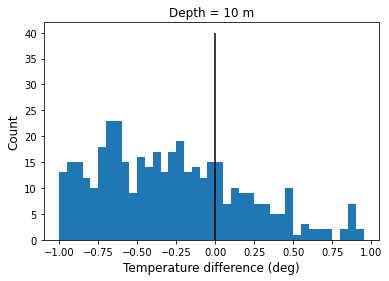

In [90]:
plt.figure(figsize = (6,4))
plt.hist(diff_t, bins=np.arange(-1,1,.05))
plt.vlines(x=0, ymin=0, ymax=40, colors='k')
plt.title('Depth = 10 m', fontsize = 12)
plt.xlabel('Temperature difference (deg)', fontsize = 12)
plt.ylabel('Count', fontsize = 12)

print("Median =", np.nanmedian(diff_t))
print("Mean =", np.nanmean(diff_t))

Median = -0.009844304764065726
Mean = 0.005572265455333431


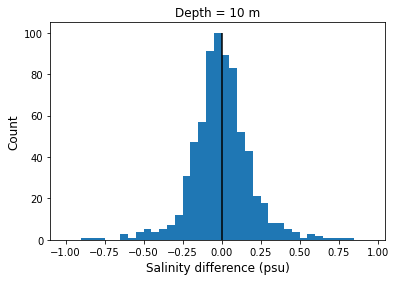

In [91]:
plt.figure(figsize = (6,4))
plt.hist(diff_s, bins=np.arange(-1,1,.05))
plt.vlines(x=0, ymin=0, ymax=100, colors='k')
plt.title('Depth = 10 m', fontsize = 12)
plt.xlabel('Salinity difference (psu)', fontsize = 12)
plt.ylabel('Count', fontsize = 12)

print("Median =", np.nanmedian(diff_s))
print("Mean =", np.nanmean(diff_s))

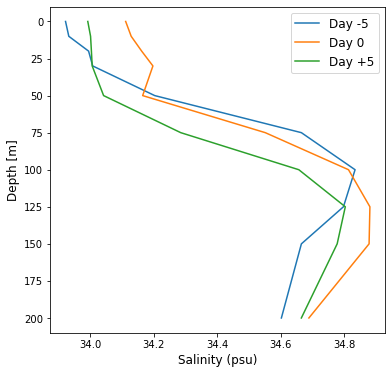

In [96]:
# Plot examples for single events
event = 643

plt.figure(figsize = (6,6))
plt.plot(salinity_day_minus5_inc[event],z_hycom, label = 'Day -5')
plt.plot(salinity_day_plus5_inc[event],z_hycom, label = 'Day 0')
plt.plot(salinity_day_0_inc[event],z_hycom, label = 'Day +5')
plt.xlabel('Salinity (psu)', fontsize = 12)
plt.ylabel('Depth [m]', fontsize = 12)
plt.gca().invert_yaxis()
plt.legend(fontsize = 12)

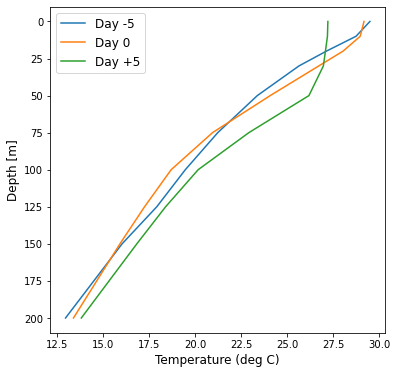

In [97]:
# Plot examples for single events
event = 643

plt.figure(figsize = (6,6))
plt.plot(temperature_day_minus5_inc[event],z_hycom, label = 'Day -5')
plt.plot(temperature_day_plus5_inc[event],z_hycom, label = 'Day 0')
plt.plot(temperature_day_0_inc[event],z_hycom, label = 'Day +5')
plt.xlabel('Temperature (deg C)', fontsize = 12)
plt.ylabel('Depth [m]', fontsize = 12)
plt.gca().invert_yaxis()
plt.legend(fontsize = 12)